In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import json 

In [48]:
time_file = 'time.json'

In [49]:
ns = [50, 200, 500]
rs = [0.1, 0.25, 0.5]
chen_participant_size = [144, 500]
algorithms = ['conjugate_priors', 'soft_kmeans', 'hard_kmeans']

In [50]:
def plot_time_synthetic(
        time_file,
        algorithm,
        ns,
        rs,
):
    with open(time_file) as f:
        time = json.load(f)
    data = time['synthetic'][algorithm]
    formatted_algorithm = algorithm.replace('_', ' ')
    dict_list = []
    for n in ns:
        for r in rs:
            dic = {}
            dic["J"] = f"$J={n}$"  # Use LaTeX formatting for italic
            dic['r'] = f"{int(r*100)}%"
            key = f"{int(n*r)}/{n}"
            dic['time'] = data[key]['duration']
            dict_list.append(dic)
    df = pd.DataFrame(dict_list)

    with sns.axes_style("whitegrid"):  # Temporarily set style
        g = sns.catplot(
            data=df, kind="bar",
            x="J", y="time", hue="r",
            palette="bright", alpha=.8,
            height=6, aspect=1.2
        )
        g.despine(left=True)

        # Set the overall title using suptitle
        g.fig.suptitle(
            f"Execution time across different combinations ({formatted_algorithm})",
            fontsize=20,
            y=1.1)

        g.legend.set_bbox_to_anchor((1.15, 0.5))  # Adjust position as needed
        # Set the axis labels
        g.set_axis_labels("", "Execution time (in minutes)", fontsize=18)
        g.legend.set_title("Healthy Ratio", prop={'size': 16})
        # Adjust the font size for the legend text
        for text in g.legend.texts:
            text.set_fontsize(14)  # Adjust as needed

        # Increase font size for x-axis and y-axis tick labels
        g.set_xticklabels(fontsize=14)
        g.set_yticklabels(fontsize=14)

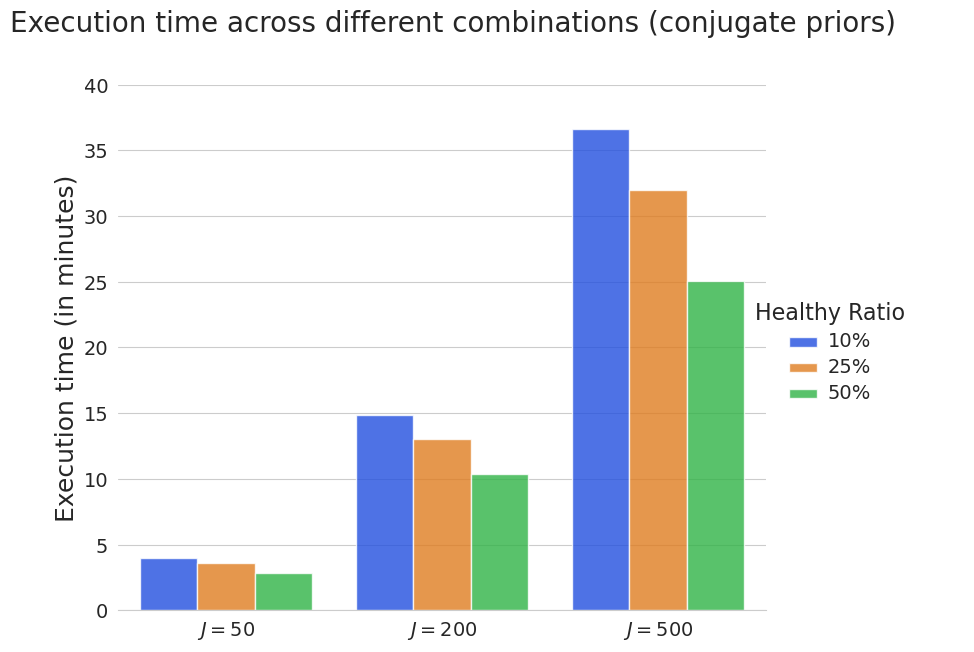

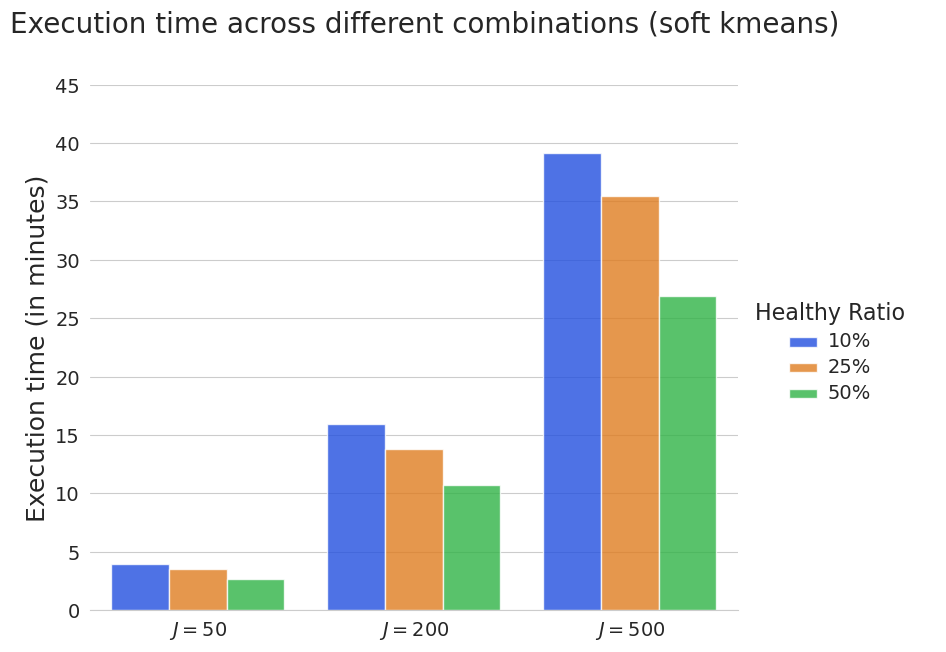

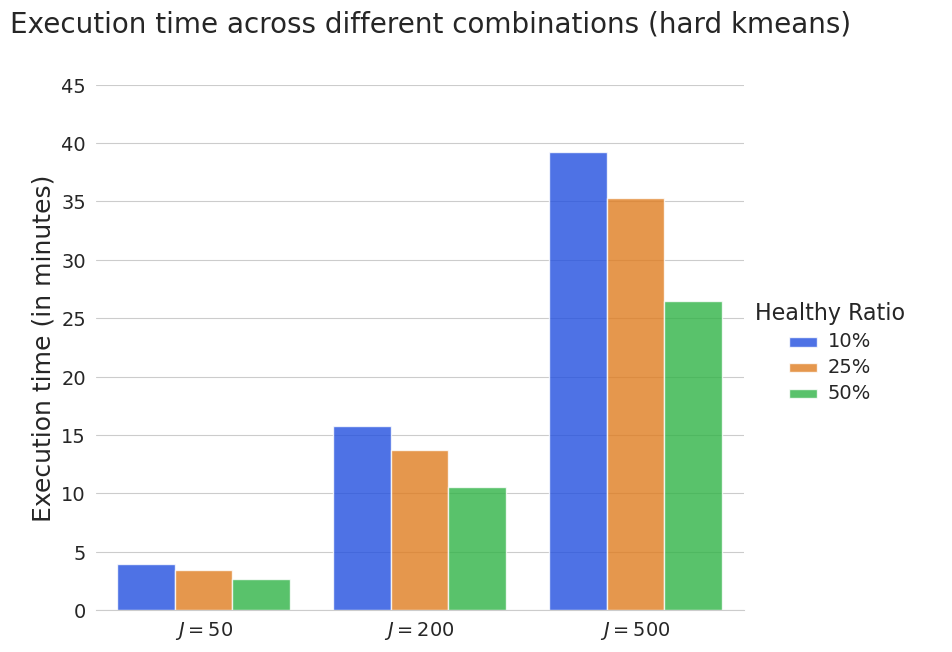

In [51]:
for algorithm in algorithms:
    plot_time_synthetic(
        time_file,
        algorithm,
        ns,
        rs,
)

In [52]:
def plot_time_chen_data(
        time_file,
        chen_participant_size,
        algorithms,
):
    with open(time_file) as f:
        time = json.load(f)

    dict_list = []
    for algorithm in algorithms:
        data = time['chen_data'][algorithm]
        for n in chen_participant_size:
            dic = {}
            dic["J"] = f"$J={n}$"  # Use LaTeX formatting for italic
            formatted_algorithm = algorithm.replace('_', ' ')
            dic['algorithm'] = formatted_algorithm
            dic['time'] = data[str(n)]['duration']
            dict_list.append(dic)
    df = pd.DataFrame(dict_list)

    with sns.axes_style("whitegrid"):  # Temporarily set style
        g = sns.catplot(
            data=df, kind="bar",
            x="J", y="time", hue="algorithm",
            palette="bright", alpha=.8,
            height=6, aspect=1.2
        )
        g.despine(left=True)

        # Set the overall title using suptitle
        g.fig.suptitle(
            f"Execution time across different algorithms (Chen's data)",
            fontsize=20,
            y=1.1)

        g.legend.set_bbox_to_anchor((1.15, 0.5))  # Adjust position as needed
        # Set the axis labels
        g.set_axis_labels("", "Execution time (in minutes)", fontsize=18)
        g.legend.set_title("Algorithm", prop={'size': 16})
        # Adjust the font size for the legend text
        for text in g.legend.texts:
            text.set_fontsize(14)  # Adjust as needed

        # Increase font size for x-axis and y-axis tick labels
        g.set_xticklabels(fontsize=14)
        g.set_yticklabels(fontsize=14)

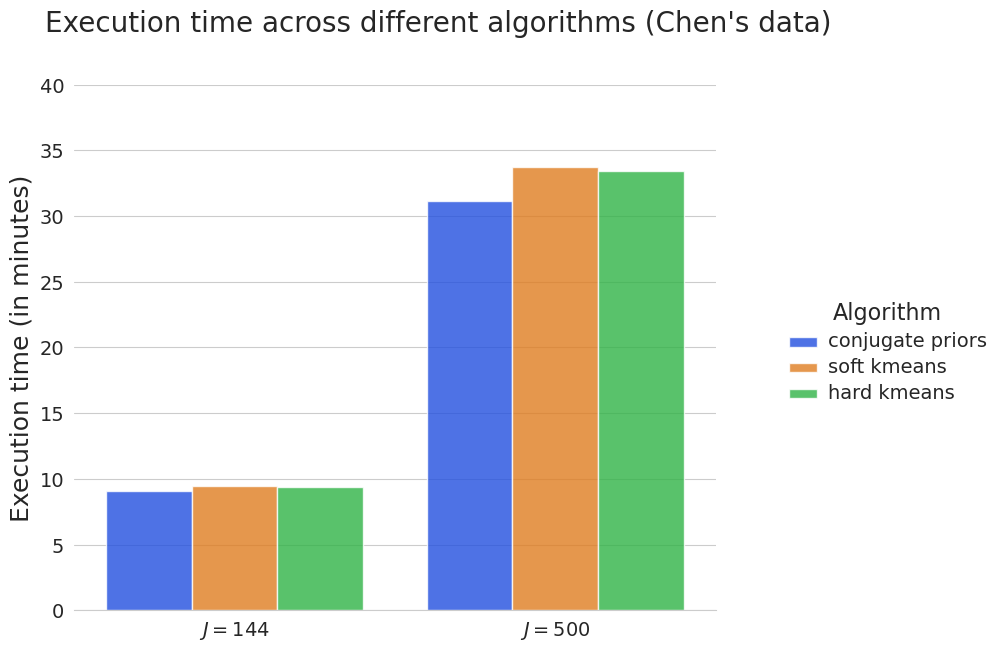

In [53]:
plot_time_chen_data(
    time_file,
    chen_participant_size,
    algorithms,
)